In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Set the path to your dataset folders for training and testing
train_data_path = "E:\Thesis\dataset\Final Dataset\Training"
test_data_path = "E:\Thesis\dataset\Final Dataset\Testing"

In [4]:
# Define image dimensions and batch size
image_width, image_height = 512, 512
batch_size = 16

In [5]:
# Create an ImageDataGenerator for data augmentation and preprocessing
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [6]:
# Load and preprocess the training data
train_generator = data_generator.flow_from_directory(
    train_data_path,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 6000 images belonging to 2 classes.


In [7]:
# Load and preprocess the testing data
test_generator = data_generator.flow_from_directory(
    test_data_path,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1200 images belonging to 2 classes.


In [8]:
# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Add custom classification layers on top of the base model
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Calculate the training and testing steps per epoch
train_steps_per_epoch = train_generator.samples // batch_size
test_steps_per_epoch = test_generator.samples // batch_size

In [10]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [11]:
# Train the model with early stopping
model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=100,
    validation_split=0.2,
    validation_steps=test_steps_per_epoch,
    callbacks=[early_stopping]
)


Epoch 1/100
375/375 [==============================] - 114s 284ms/step - loss: 0.4021 - accuracy: 0.8353 - val_loss: 0.3098 - val_accuracy: 0.8683
Epoch 2/100
375/375 [==============================] - 96s 256ms/step - loss: 0.2602 - accuracy: 0.8892 - val_loss: 0.3195 - val_accuracy: 0.8575
Epoch 3/100
375/375 [==============================] - 92s 244ms/step - loss: 0.2164 - accuracy: 0.9145 - val_loss: 0.2841 - val_accuracy: 0.8800
Epoch 4/100
375/375 [==============================] - 90s 240ms/step - loss: 0.2030 - accuracy: 0.9177 - val_loss: 0.6685 - val_accuracy: 0.7158
Epoch 5/100
375/375 [==============================] - 94s 250ms/step - loss: 0.1526 - accuracy: 0.9388 - val_loss: 0.7494 - val_accuracy: 0.7833
Epoch 6/100
375/375 [==============================] - 88s 234ms/step - loss: 0.1476 - accuracy: 0.9448 - val_loss: 0.3071 - val_accuracy: 0.8792


In [12]:
# Evaluate the model on the test data
test_generator.reset()
predictions = model.predict(test_generator, steps=test_steps_per_epoch)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

75/75 [==============================] - 9s 114ms/step


In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_steps_per_epoch)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

75/75 [==============================] - 9s 113ms/step - loss: 0.2841 - accuracy: 0.8800
Test Loss: 0.2840641736984253
Test Accuracy: 0.8799999952316284


In [14]:
# Calculate prediction accuracy
prediction_accuracy = accuracy_score(true_labels, predicted_labels)
print('Prediction Accuracy:', prediction_accuracy)

Prediction Accuracy: 0.88


In [15]:
# Create a dictionary to map label indices to label names
label_map = train_generator.class_indices


In [16]:
print('Classification Report:')
print(classification_report(true_labels, predicted_labels, target_names=label_map))


Classification Report:
              precision    recall  f1-score   support

      Female       0.93      0.82      0.87       600
        male       0.84      0.94      0.89       600

    accuracy                           0.88      1200
   macro avg       0.89      0.88      0.88      1200
weighted avg       0.89      0.88      0.88      1200



In [17]:
print('Confusion Matrix:')
confusion_mat=confusion_matrix(true_labels, predicted_labels)
print(confusion_mat)

Confusion Matrix:
[[491 109]
 [ 35 565]]


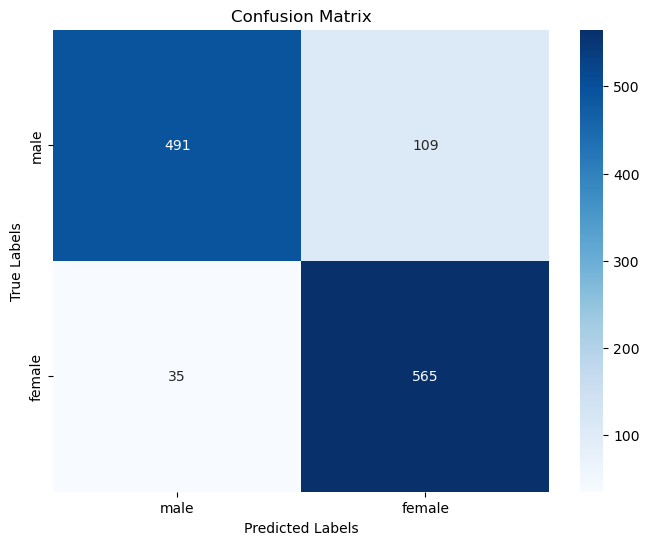

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Plot confusion matrix as a heatmap
labels = ["male", "female"]
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
